In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.inspection import permutation_importance

from imblearn.over_sampling import SMOTE

In [3]:
from sklearn.model_selection import StratifiedKFold, GridSearchCV

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.linear_model import Lasso

import xgboost as xgb
from xgboost import plot_importance
from matplotlib import pyplot

In [4]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [5]:
data = pd.read_csv("data/fracta_Dec3.csv")

In [6]:
data.head()

,pipe_id,install_year,material,diameter,break_year,env_dat_0,env_dat_1,env_dat_2,env_dat_3,env_dat_4,...,env_dat_135,env_dat_136,env_dat_137,env_dat_138,env_dat_139,env_dat_140,env_dat_141,env_dat_142,env_dat_143,env_dat_144
0,P0000000000,1985,D,20.32,NaN,623.542175,18.052843,14.161422,10.268579,159.662827,...,554.479675,20.000000,0.000038,438.628143,27.000000,3085.786865,0.002728,0.311803,0.0,0.0
1,P0000000001,1934,C,15.24,NaN,644.830017,17.790001,13.830000,9.870000,257.001221,...,276.357605,9.200573,0.304329,239.719299,32.571018,3188.292236,0.003291,0.322161,0.0,0.0
2,P0000000002,1904,C,20.32,NaN,604.570007,18.219999,14.350000,10.470000,225.165039,...,236.882950,4.872639,0.182168,500.638367,28.978306,4542.257324,0.002928,0.458972,0.0,0.0
3,P0000000003,1979,D,15.24,NaN,573.424011,17.671381,14.132636,10.586646,170.244339,...,321.886658,12.353504,0.480517,295.554504,41.983772,4521.720215,0.004242,0.456897,0.0,0.0
4,P0000000004,1987,D,20.32,NaN,583.429993,18.280001,14.350000,10.420000,171.034073,...,758.841431,25.052542,0.021532,778.687256,25.842377,4978.718262,0.002611,0.503074,0.0,0.0


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56774 entries, 0 to 56773
Columns: 150 entries, pipe_id to env_dat_144
dtypes: float64(143), int64(5), object(2)
memory usage: 65.0+ MB


In [8]:
data.loc[:,['install_year','diameter','break_year']].describe()

,install_year,diameter,break_year
count,56774.000000,56460.000000,3144.000000
mean,1962.653063,22.803451,1998.225191
std,37.206654,13.692069,11.343908
min,1861.000000,5.080000,1980.000000
25%,1934.000000,15.240000,1988.000000
50%,1964.000000,20.320000,1998.000000
75%,1999.000000,20.320000,2009.000000
max,2017.000000,121.920000,2016.000000


In [9]:
data["break_year"].value_counts()

2015.0    143
1990.0    125
1988.0    123
2008.0    120
1993.0    117
2016.0    115
2013.0    113
2009.0    112
1982.0    112
1984.0    104
2007.0    102
1987.0     98
2004.0     95
2003.0     90
1983.0     86
1985.0     85
1981.0     85
2014.0     83
1986.0     82
2012.0     79
1989.0     78
1991.0     76
1992.0     75
2010.0     74
1980.0     74
2011.0     73
1994.0     73
2001.0     67
1995.0     67
2006.0     65
1998.0     60
2002.0     55
2005.0     53
1999.0     51
2000.0     50
1997.0     50
1996.0     34
Name: break_year, dtype: int64

In [10]:
data['if_broken'] = 0
data.loc[data.break_year.notnull(),'if_broken'] = 1

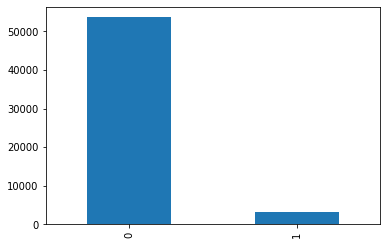

In [11]:
data['if_broken'].value_counts().plot(kind='bar')
plt.show()

In [12]:
data['if_broken'].value_counts()

0    53630
1     3144
Name: if_broken, dtype: int64

In [13]:
data['years_since'] = (2020 - data['install_year'])
data.loc[data.if_broken == 1, 'years_since'] = data['break_year'] - data['install_year']
data['years_since'] = data['years_since'].astype('int')

In [14]:
data['years_since'].describe()

count    56774.000000
mean        56.141103
std         36.912893
min          0.000000
25%         21.000000
50%         54.000000
75%         85.000000
max        159.000000
Name: years_since, dtype: float64

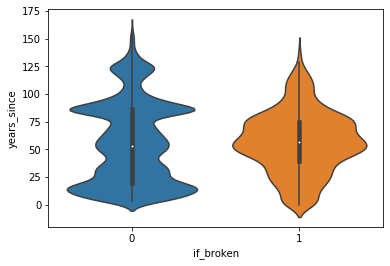

In [15]:
sns.violinplot(data = data, x = 'if_broken', y = 'years_since')
plt.show()

In [16]:
data[['material','if_broken']] = data[['material','if_broken']].astype('category')

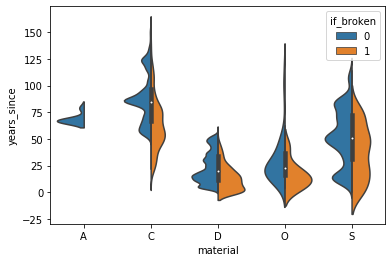

In [17]:
sns.violinplot(data = data, x = 'material', y = 'years_since', hue='if_broken', split=True)
plt.show()

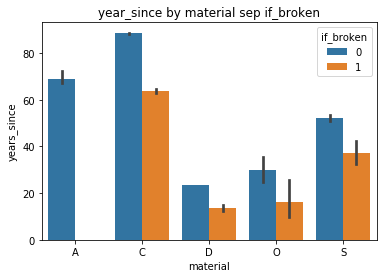

In [18]:
sns.barplot(data = data, x = 'material', y = 'years_since', hue='if_broken')
plt.title('year_since by material sep if_broken')
plt.show()

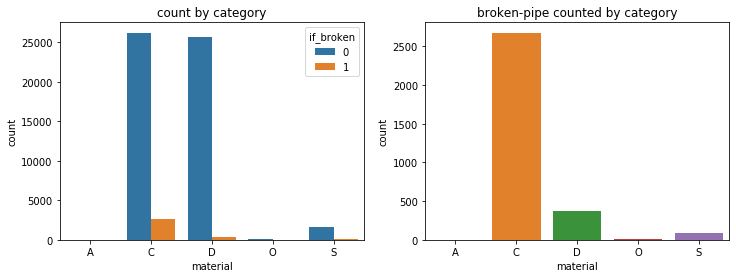

In [19]:
fig = plt.figure(figsize=(12,4))
ax1 = fig.add_subplot(1,2,1)
sns.countplot(data = data, x = 'material', hue='if_broken', ax=ax1)
plt.title('count by category')

ax2 = fig.add_subplot(1,2,2)
sns.countplot(data = data.loc[data.if_broken==1], x = 'material',  ax=ax2)
plt.title('broken-pipe counted by category')
plt.show()

## check correlations

In [20]:
data.head()

,pipe_id,install_year,material,diameter,break_year,env_dat_0,env_dat_1,env_dat_2,env_dat_3,env_dat_4,...,env_dat_137,env_dat_138,env_dat_139,env_dat_140,env_dat_141,env_dat_142,env_dat_143,env_dat_144,if_broken,years_since
0,P0000000000,1985,D,20.32,NaN,623.542175,18.052843,14.161422,10.268579,159.662827,...,0.000038,438.628143,27.000000,3085.786865,0.002728,0.311803,0.0,0.0,0,35
1,P0000000001,1934,C,15.24,NaN,644.830017,17.790001,13.830000,9.870000,257.001221,...,0.304329,239.719299,32.571018,3188.292236,0.003291,0.322161,0.0,0.0,0,86
2,P0000000002,1904,C,20.32,NaN,604.570007,18.219999,14.350000,10.470000,225.165039,...,0.182168,500.638367,28.978306,4542.257324,0.002928,0.458972,0.0,0.0,0,116
3,P0000000003,1979,D,15.24,NaN,573.424011,17.671381,14.132636,10.586646,170.244339,...,0.480517,295.554504,41.983772,4521.720215,0.004242,0.456897,0.0,0.0,0,41
4,P0000000004,1987,D,20.32,NaN,583.429993,18.280001,14.350000,10.420000,171.034073,...,0.021532,778.687256,25.842377,4978.718262,0.002611,0.503074,0.0,0.0,0,33


In [21]:
data1 = data.copy()

In [22]:
# drop cols that std == 0
drop_cols_w0 = [ data.columns[i]  for i in range(5,len(data.columns)-2)  if data.iloc[:,i].std()==0]
data1.drop(drop_cols_w0,axis=1,inplace=True)

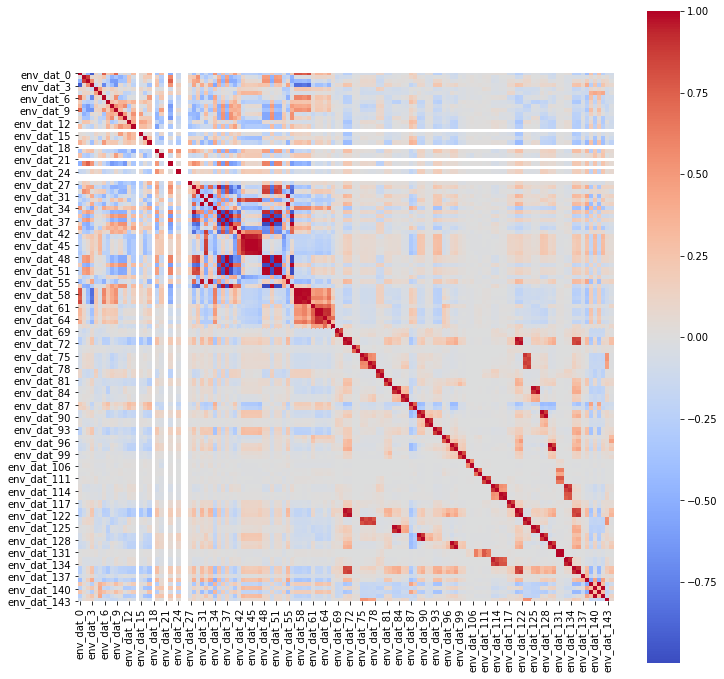

In [23]:
plt.figure(figsize=(12,12))
sns.heatmap(data1.iloc[:,5:-2].corr(),cmap='coolwarm',square=True)
plt.show()

In [24]:
data_corr_09 = data1.iloc[:,5:-2].corr()[abs(data1.iloc[:,5:-2].corr())>=0.8]
data1.loc[:,data_corr_09[data_corr_09.sum()>1].index].corr().head()

,env_dat_1,env_dat_2,env_dat_28,env_dat_30,env_dat_31,env_dat_32,env_dat_33,env_dat_35,env_dat_37,env_dat_43,...,env_dat_131,env_dat_132,env_dat_133,env_dat_134,env_dat_135,env_dat_136,env_dat_139,env_dat_140,env_dat_141,env_dat_142
env_dat_1,1.000000,0.870563,0.236699,0.544029,-0.165454,-0.306537,-0.165532,0.341890,0.445214,0.087054,...,0.013105,0.013105,-0.039676,-0.035233,-0.054156,-0.048356,0.073479,-0.000776,0.073479,-0.000776
env_dat_2,0.870563,1.000000,0.414326,0.468591,0.065624,-0.207148,0.065202,0.471353,0.519546,0.190713,...,0.015510,0.015510,-0.045264,-0.042144,0.080846,0.086216,-0.062997,0.119452,-0.062997,0.119452
env_dat_28,0.236699,0.414326,1.000000,0.405510,0.719166,-0.472695,0.719969,0.965521,0.870234,0.003900,...,0.006396,0.006396,-0.050805,-0.057718,0.318146,0.298716,-0.312843,0.132393,-0.312843,0.132393
env_dat_30,0.544029,0.468591,0.405510,1.000000,-0.330874,-0.425753,-0.330791,0.611290,0.801210,0.306419,...,-0.000241,-0.000241,-0.033301,-0.043262,0.010354,-0.004536,0.087659,0.062677,0.087659,0.062677
env_dat_31,-0.165454,0.065624,0.719166,-0.330874,1.000000,-0.160630,0.999029,0.540467,0.297145,-0.212183,...,0.014715,0.014715,-0.028938,-0.028574,0.318489,0.308435,-0.407430,0.065238,-0.407430,0.065238


In [25]:
data_corr_09_list = data_corr_09[data_corr_09.sum()>1].index

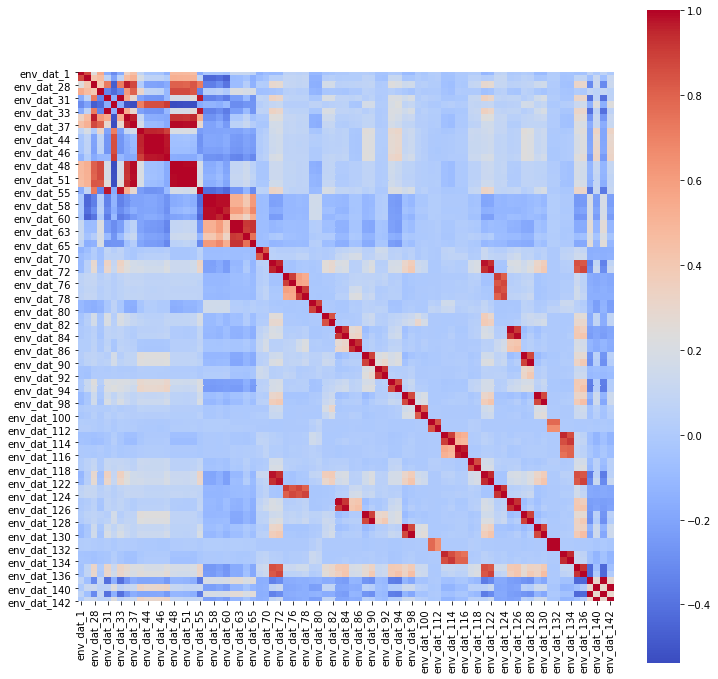

In [26]:
plt.figure(figsize=(12,12))
sns.heatmap(data.loc[:,data_corr_09_list].corr(),cmap='coolwarm',square=True)
plt.show()

In [27]:
data_corr_09_list = data_corr_09[data_corr_09.notnull().sum()>1].index.to_list()
len(data_corr_09_list)

88

In [28]:
check_df = data_corr_09.loc[data_corr_09_list,data_corr_09_list]
corr_high_df = pd.DataFrame(index = data_corr_09_list, columns = [0,1,2,3])
for i in range(len(data_corr_09_list)):
    num = 0
    for v in range(len(data_corr_09_list)):
        if data_corr_09_list[v] == data_corr_09_list[i]:
            pass
        else:
            if pd.notnull(check_df.iloc[i,v]):
                corr_high_df.loc[data_corr_09_list[i],num] = data_corr_09_list[v]
                num += 1

In [29]:
corr_high_df["sum"] = 0
for i in range(len(corr_high_df)):
    corr_high_df.iloc[i,-1] = len(corr_high_df.iloc[i].dropna())
corr_high_df = corr_high_df.sort_values('sum',ascending=False)
corr_high_df.drop('sum',axis=1,inplace=True)

In [30]:
pre_corr_high_df = corr_high_df.copy()
for i in range(len(corr_high_df)):
    if corr_high_df.index[i] in pre_corr_high_df.index:
        for v in range(len(corr_high_df.columns)):
            if pd.isna(pre_corr_high_df.loc[corr_high_df.index[i],v]):
                break
            else:
                if pre_corr_high_df.loc[corr_high_df.index[i],v] in pre_corr_high_df.index:
                    pre_corr_high_df.drop(pre_corr_high_df.loc[corr_high_df.index[i],v], axis=0, inplace=True)  

In [31]:
high_corr_drop_list = pre_corr_high_df.index

In [32]:
for i in range(len(high_corr_drop_list)):
    data_corr_09_list.remove(high_corr_drop_list[i])

In [33]:
high_corr_drop_list

Index(['env_dat_56', 'env_dat_45', 'env_dat_123', 'env_dat_121', 'env_dat_60',
       'env_dat_128', 'env_dat_114', 'env_dat_130', 'env_dat_84', 'env_dat_42',
       'env_dat_63', 'env_dat_55', 'env_dat_131', 'env_dat_139', 'env_dat_140',
       'env_dat_118', 'env_dat_81', 'env_dat_86', 'env_dat_2', 'env_dat_69',
       'env_dat_79', 'env_dat_91', 'env_dat_116', 'env_dat_93', 'env_dat_99',
       'env_dat_111'],
      dtype='object')

In [34]:
len(data_corr_09_list)

62

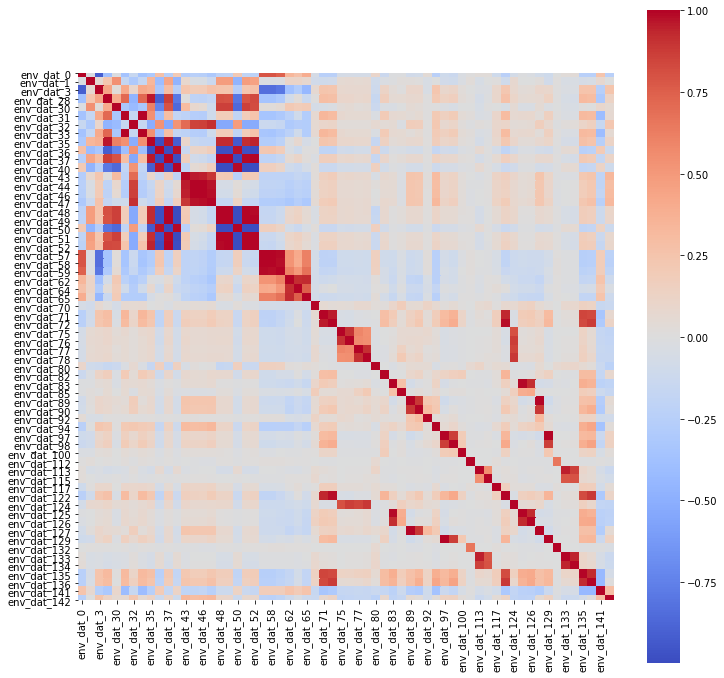

In [35]:
plt.figure(figsize=(12,12))
sns.heatmap(data.loc[:,data_corr_09_list].corr(),cmap='coolwarm',square=True)
plt.show()

In [36]:
data1 = data.drop(high_corr_drop_list,axis=1)

## Check Null values

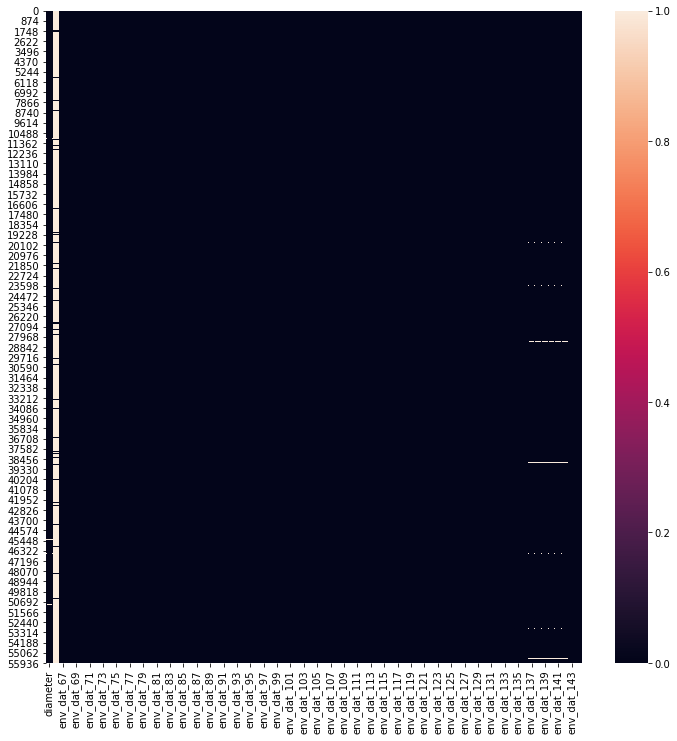

In [37]:
cols_w_null = data.loc[:,data.isnull().sum()>0]

plt.figure(figsize=(12,12))
sns.heatmap(cols_w_null.isnull())
plt.show()

In [38]:
df = data1.copy()

In [39]:
df.drop(['install_year','break_year'], axis=1, inplace=True)
df.dropna(axis=0, inplace=True)

In [40]:
df1 = pd.concat([df,pd.get_dummies(df.material,drop_first=True)],axis=1)

In [41]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 55950 entries, 0 to 56773
Columns: 128 entries, pipe_id to S
dtypes: category(2), float64(116), int32(1), int64(4), object(1), uint8(4)
memory usage: 52.6+ MB


## definitions

In [42]:
y = df1[ 'if_broken' ]
X = df1.drop( ['pipe_id','material','if_broken'], axis = 1 )

X_train, X_test, y_train, y_test = train_test_split( X, y, test_size = 0.4, random_state = 21, stratify = y )

In [43]:
def evaluations(y_pred, X_train, X_test, y_train, y_test):
    print( confusion_matrix( y_test, y_pred ) )
    print( classification_report( y_test, y_pred ) )

In [44]:
def evaluations_roc(model, y_pred, X_train, X_test, y_train, y_test, if_plot):
    print( confusion_matrix( y_test, y_pred ) )
    print( classification_report( y_test, y_pred ) )
    
    y_pred_prob = model.predict_proba( X_test )[ :, 1 ]
    aucscore = roc_auc_score( y_test, y_pred_prob )
    if if_plot == False:
        return aucscore
    else:
        print( f'AUC score: {aucscore}' )

        fpr, tpr, thresholds = roc_curve( y_test, y_pred_prob )

        plt.plot( [ 0, 1 ], [ 0, 1 ], 'k--' )
        plt.plot( fpr, tpr )
        plt.xlabel('False Positive Rate' )
        plt.ylabel('True Positive Rate')
        plt.title('ROC Curve' )
        plt.show( )

In [45]:
def model_checks(model, X_train=X_train, X_test=X_test, y_train=y_train, y_test=y_test):
    model.fit(X_train,y_train)
    ypred = model.predict(X_test)
    
    evaluations(ypred, X_train, X_test, y_train, y_test)
    return model

In [46]:
def model_checks_roc(model, X_train=X_train, X_test=X_test, y_train=y_train, y_test=y_test, if_plot=True):
    model.fit(X_train,y_train)
    ypred = model.predict(X_test)
    
    if if_plot == False:
        auc = evaluations_roc(model, ypred, X_train, X_test, y_train, y_test, if_plot)
        return model,auc
    else:
        evaluations_roc(model, ypred, X_train, X_test, y_train, y_test, if_plot)
        return model

## dataset preparation

In [47]:
lr = LogisticRegression(max_iter=10000)
lr_fit = model_checks(lr)

[[21122     8]
 [ 1081   169]]
              precision    recall  f1-score   support

           0       0.95      1.00      0.97     21130
           1       0.95      0.14      0.24      1250

    accuracy                           0.95     22380
   macro avg       0.95      0.57      0.61     22380
weighted avg       0.95      0.95      0.93     22380



In [48]:
svc = SVC()
svc_fit = model_checks(svc)

[[21130     0]
 [ 1250     0]]
              precision    recall  f1-score   support

           0       0.94      1.00      0.97     21130
           1       0.00      0.00      0.00      1250

    accuracy                           0.94     22380
   macro avg       0.47      0.50      0.49     22380
weighted avg       0.89      0.94      0.92     22380



C:\Users\maann\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [49]:
xgbc =  xgb.XGBClassifier(objective="binary:logistic", n_estimators=10, seed=123,use_label_encoder=False)
xgbc_fit = model_checks(xgbc)

[12:32:13] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[[21124     6]
 [  826   424]]
              precision    recall  f1-score   support

           0       0.96      1.00      0.98     21130
           1       0.99      0.34      0.50      1250

    accuracy                           0.96     22380
   macro avg       0.97      0.67      0.74     22380
weighted avg       0.96      0.96      0.95     22380



## imbalance data

In [50]:
sm = SMOTE(k_neighbors=10)
X_resampled, y_resampled = sm.fit_sample(X_train, y_train)

In [51]:
# y1 = df1[ 'if_broken' ]
# X1 = df1.drop( ['pipe_id','material','if_broken'], axis = 1 )

# X1_train, X1_test, y1_train, y1_test = train_test_split( X1, y1, test_size = 0.4, random_state = 21, stratify = y1 )

# X1y1_train = X1_train.join(y1_train)
# X1y1_train_y0 = X1y1_train.loc[X1y1_train.if_broken == 0]

# X1y1_train_y0_down, _  = train_test_split( X1y1_train_y0, test_size = 0.5, random_state = 21)

# Xy1_down = X1y1_train_y0_down.append( X1y1_train.loc[X1y1_train.if_broken == 1])

# X1_down = Xy1_down.drop("if_broken",axis=1)
# y1_down = Xy1_down.if_broken

# sm = SMOTE(k_neighbors=7)
# X_resampled, y_resampled = sm.fit_sample(X1_down, y1_down)

C:\Users\maann\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of f AND g EVALUATIONS EXCEEDS LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[[17357  3773]
 [  409   841]]
              precision    recall  f1-score   support

           0       0.98      0.82      0.89     21130
           1       0.18      0.67      0.29      1250

    accuracy                           0.81     22380
   macro avg       0.58      0.75      0.59     22380
weighted avg       0.93      0.81      0.86     22380

AUC score: 0.8253583341221012


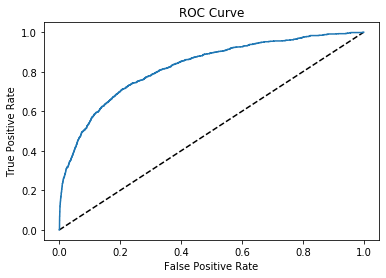

In [52]:
lr1 = LogisticRegression(max_iter=500000)
lr1_fit = model_checks_roc(lr1, X_train=X_resampled, y_train=y_resampled)

[12:44:23] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[[19765  1365]
 [  426   824]]
              precision    recall  f1-score   support

           0       0.98      0.94      0.96     21130
           1       0.38      0.66      0.48      1250

    accuracy                           0.92     22380
   macro avg       0.68      0.80      0.72     22380
weighted avg       0.95      0.92      0.93     22380

AUC score: 0.8970964316138191


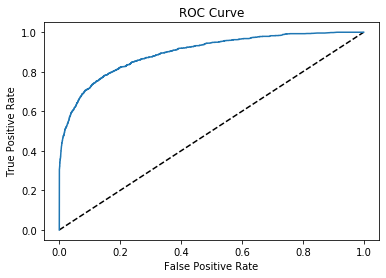

In [53]:
xgbc1 =  xgb.XGBClassifier(objective="binary:logistic", n_estimators=10, seed=123, use_label_encoder=False)
xgbc1_fit = model_checks_roc(xgbc1, X_train=X_resampled, y_train=y_resampled) 

In [54]:
params = {'eta': [1.0], 'gamma': [0.5,0.7], 'max_depth':[12,15,17,20],  }

xgbc2 =  xgb.XGBClassifier(objective="binary:logistic", n_estimators=10, seed=123, use_label_encoder=False)

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=1)
clf = GridSearchCV(estimator=xgbc2, param_grid=params, 
                    cv=skf, scoring="roc_auc", n_jobs=1)
clf.fit(X_resampled, y_resampled)

[12:44:37] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:44:55] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:45:20] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:45:39] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[12:54:11] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:54:34] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:54:58] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:55:19] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=1, shuffle=True),
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing...monotone_constraints=None,
                                     n_estimators=10, n_jobs=None,
                                     num_parallel_tree=None, random_state=None,
                                     reg_alpha=None, reg_lambda=None,
                                     scale_pos_weight=None, seed=123,
        

In [55]:
print("Best score: %.4f" % (clf.best_score_))
print(clf.best_params_)

Best score: 0.9973
{'eta': 1.0, 'gamma': 0.5, 'max_depth': 15}


[12:59:41] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[[20716   414]
 [  467   783]]
              precision    recall  f1-score   support

           0       0.98      0.98      0.98     21130
           1       0.65      0.63      0.64      1250

    accuracy                           0.96     22380
   macro avg       0.82      0.80      0.81     22380
weighted avg       0.96      0.96      0.96     22380

AUC score: 0.9169872787505916


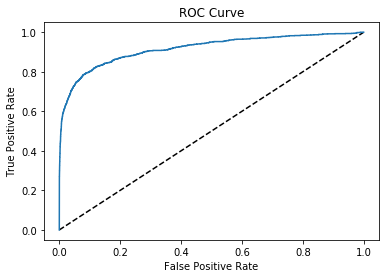

In [56]:
xgbc3_w =  xgb.XGBClassifier(objective="binary:logistic", eta = 1.0, gamma = 0.5, max_depth = 15,
                           n_estimators=10, seed=123, use_label_encoder=False, importance_type='weight')
xgbc3_w_fit = model_checks_roc(xgbc3_w, X_train=X_resampled, y_train=y_resampled, if_plot=True) 

In [57]:
xgbc3_g =  xgb.XGBClassifier(objective="binary:logistic", eta = 1.0, gamma = 0.5, max_depth = 15,
                           n_estimators=10, seed=123, use_label_encoder=False, importance_type='gain')
xgbc3_g_fit, _ = model_checks_roc(xgbc3_g, X_train=X_resampled, y_train=y_resampled,if_plot=False) 

[13:00:12] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[[20716   414]
 [  467   783]]
              precision    recall  f1-score   support

           0       0.98      0.98      0.98     21130
           1       0.65      0.63      0.64      1250

    accuracy                           0.96     22380
   macro avg       0.82      0.80      0.81     22380
weighted avg       0.96      0.96      0.96     22380



”weight” is the number of times a feature appears in a tree  
”gain” is the average gain of splits which use the feature  
”cover” is the average coverage of splits which use the feature where coverage is defined as the number of samples affected by the split

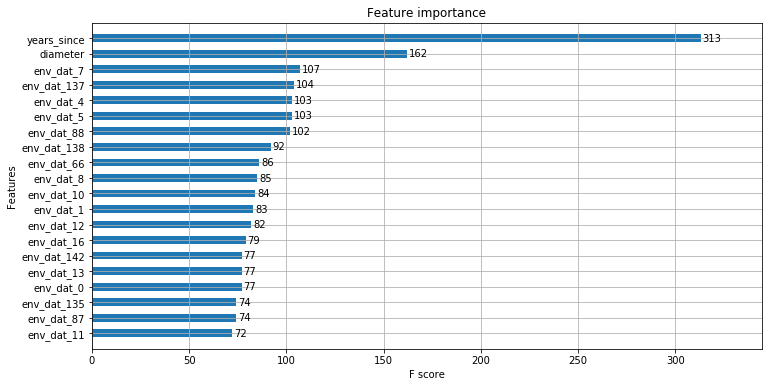

In [58]:
_, ax = plt.subplots(figsize=(12, 6))
plot_importance(xgbc3_w_fit,max_num_features=20, height=0.5, ax=ax, importance_type='weight')
pyplot.show()

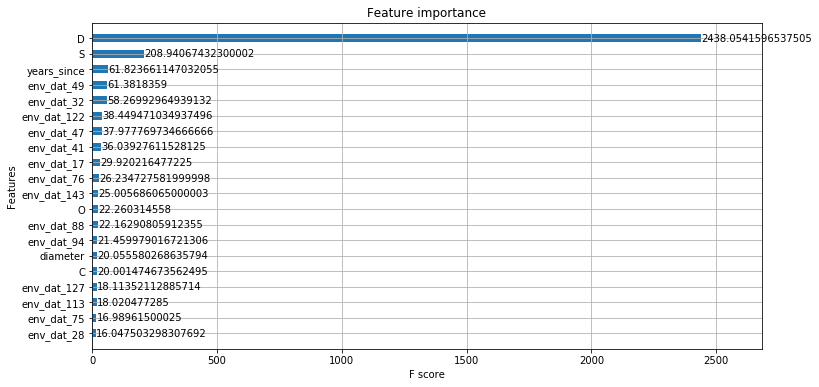

In [59]:
_, ax = plt.subplots(figsize=(12, 6))
plot_importance(xgbc3_w_fit,max_num_features=20, height=0.5, ax=ax, importance_type='gain')
pyplot.show()

In [60]:
weight_df = pd.DataFrame({ 'cols':X_train.columns, 
                          'weight':xgbc3_w_fit.feature_importances_, 
                          'gain':xgbc3_g_fit.feature_importances_})
weight_df = weight_df.sort_values('weight', ascending=False)
weight_df = weight_df.set_index('cols')
weight_df.head()

,weight,gain
cols,,
years_since,0.085613,0.016636
diameter,0.044311,0.005397
env_dat_7,0.029267,0.002873
env_dat_137,0.028446,0.003190
env_dat_4,0.028173,0.001687


### Permutation to see feature importances

In [61]:
pi_g = permutation_importance(xgbc3_w_fit, X_resampled, y_resampled,n_repeats=50, random_state=0)

In [62]:
pi_df = pd.DataFrame(index=X_resampled.columns, data={"value":pi_g.importances_mean})
selected_features = pi_df.sort_values("value", ascending=False).head(30).index
selected_features

Index(['D', 'years_since', 'diameter', 'S', 'env_dat_88', 'env_dat_24',
       'env_dat_94', 'env_dat_17', 'env_dat_137', 'env_dat_32', 'C',
       'env_dat_9', 'env_dat_22', 'env_dat_11', 'env_dat_7', 'env_dat_8',
       'env_dat_5', 'env_dat_89', 'env_dat_142', 'env_dat_13', 'env_dat_141',
       'env_dat_97', 'env_dat_4', 'env_dat_138', 'env_dat_19', 'env_dat_10',
       'env_dat_1', 'env_dat_34', 'env_dat_66', 'env_dat_122'],
      dtype='object')

### checking if the model can predict only with selected(TOP30) features

In [63]:
X_resampled_pi = X_resampled.loc[:,pi_df.sort_values("value", ascending=False).head(30).index]
X_test_pi = X_test.loc[:,pi_df.sort_values("value", ascending=False).head(30).index]

[15:57:06] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[[20705   425]
 [  487   763]]
              precision    recall  f1-score   support

           0       0.98      0.98      0.98     21130
           1       0.64      0.61      0.63      1250

    accuracy                           0.96     22380
   macro avg       0.81      0.80      0.80     22380
weighted avg       0.96      0.96      0.96     22380

AUC score: 0.9206181732134406


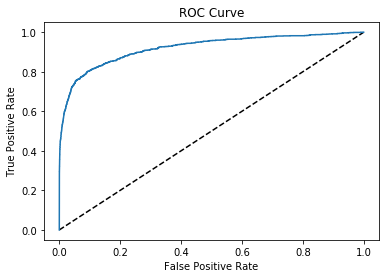

In [64]:
xgbc30_pi =  xgb.XGBClassifier(objective="binary:logistic", eta = 1.0, gamma = 0.5, max_depth = 15,
                           n_estimators=10, seed=123, use_label_encoder=False, importance_type='gain')
xgbc30_pi_fit = model_checks_roc(xgbc3_g, X_train=X_resampled_pi, X_test=X_test_pi, 
                               y_train=y_resampled, y_test=y_test, if_plot=True) 

[15:57:25] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[[19694  1436]
 [  519   731]]
              precision    recall  f1-score   support

           0       0.97      0.93      0.95     21130
           1       0.34      0.58      0.43      1250

    accuracy                           0.91     22380
   macro avg       0.66      0.76      0.69     22380
weighted avg       0.94      0.91      0.92     22380

AUC score: 0.8796063795551348


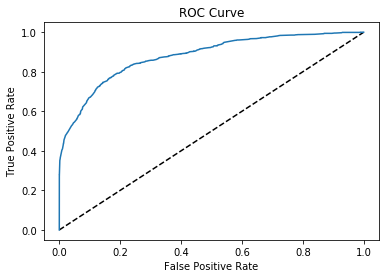

In [65]:
selected_features2 = ['D', 'years_since', 'diameter', 'S',  'C',  'O']

X_resampled_pi2 = X_resampled.loc[:,selected_features2]
X_test_pi2 = X_test.loc[:,selected_features2]

xgbc30_pi2 =  xgb.XGBClassifier(objective="binary:logistic", eta = 1.0, gamma = 0.8, max_depth = 8,
                           n_estimators=10, seed=123, use_label_encoder=False, importance_type='gain')
xgbc30_pi_fit2 = model_checks_roc(xgbc30_pi2, X_train=X_resampled_pi2, X_test=X_test_pi2, 
                               y_train=y_resampled, y_test=y_test, if_plot=True) 

## Prediction 2021

In [77]:
df1_target = df1.loc[df1.if_broken==0].copy()
df1_target['years_since'] = df1_target['years_since'] + 1
X_3_target = df1_target.drop( ['pipe_id','material','if_broken'], axis = 1 )

In [78]:
ypred_3 = xgbc3_w_fit.predict(X_3_target)
ypred_proba_3 = xgbc3_w_fit.predict_proba(X_3_target)

In [79]:
pred_21 = df1_target.loc[:,["pipe_id","material","years_since"]]
pred_21["pred_3"] = ypred_3
pred_21["pred_proba_3"] = ypred_proba_3[:,1]

In [80]:
pred_21

,pipe_id,material,years_since,pred_3,pred_proba_3
0,P0000000000,D,36,0,0.000154
1,P0000000001,C,87,0,0.125367
2,P0000000002,C,117,0,0.004219
3,P0000000003,D,42,0,0.246443
4,P0000000004,D,34,0,0.000556
...,...,...,...,...,...
56769,P0000055554,D,5,0,0.000843
56770,P0000055555,D,5,0,0.000843
56771,P0000055556,D,5,0,0.000843
56772,P0000055557,D,5,0,0.000843


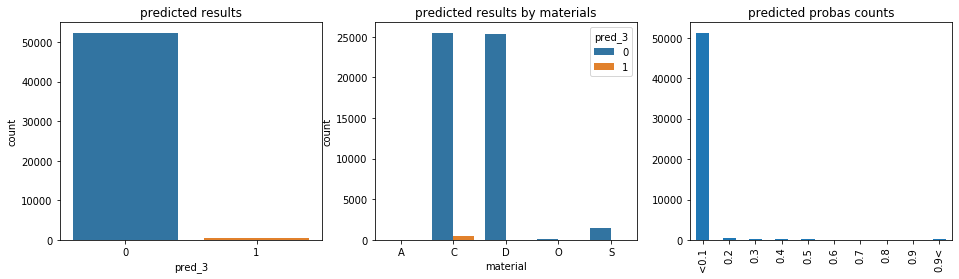

In [82]:
counted_label = ['<0.1','0.2','0.3','0.4','0.5','0.6','0.7','0.8','0.9','0.9<']
fig = plt.figure(figsize=(16,4))
ax1 = fig.add_subplot(1,3,1)
sns.countplot(data=pred_21, x="pred_3", ax=ax1 )
plt.title("predicted results")

ax2 = fig.add_subplot(1,3,2)
sns.countplot(data=pred_21, x="material", ax=ax2, hue="pred_3" )
plt.title("predicted results by materials")

ax3 = fig.add_subplot(1,3,3)
pd.cut(pred_21["pred_proba_3"],10, labels=counted_label).value_counts().sort_index().plot(kind='bar',ax=ax3)
plt.title("predicted probas counts")

plt.show()

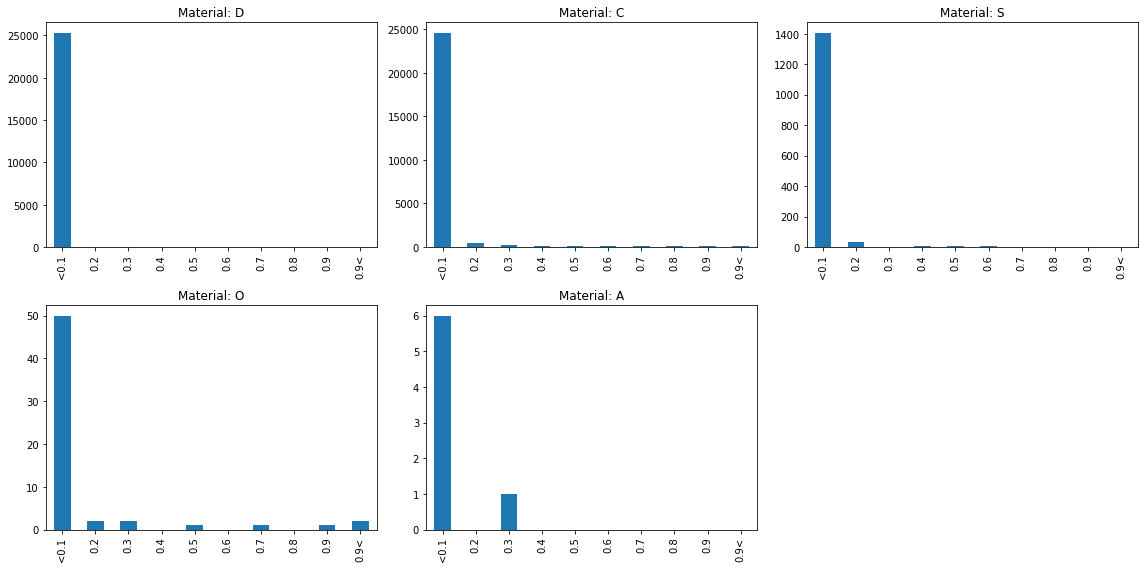

In [90]:
counted_label = ['<0.1','0.2','0.3','0.4','0.5','0.6','0.7','0.8','0.9','0.9<']
mate_list = pred_21.material.unique()
fig = plt.figure(figsize=(16,8))
for i in range(len(mate_list)):
    ax1 = fig.add_subplot(2,3,i+1)
    pd.cut(pred_21.loc[pred_21.material==mate_list[i],"pred_proba_3"],bins = [0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1],
           labels=counted_label).value_counts().sort_index().plot(kind='bar',ax=ax1)
    plt.title(f"Material: {mate_list[i]}")

plt.tight_layout()
plt.show()

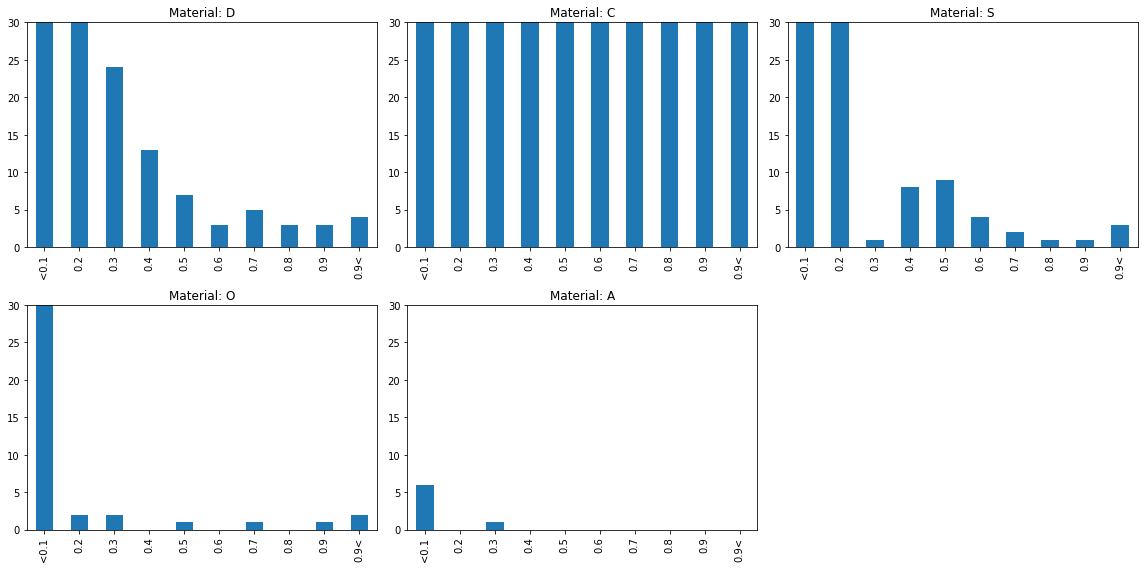

In [91]:
counted_label = ['<0.1','0.2','0.3','0.4','0.5','0.6','0.7','0.8','0.9','0.9<']
mate_list = pred_21.material.unique()
fig = plt.figure(figsize=(16,8))
for i in range(len(mate_list)):
    ax1 = fig.add_subplot(2,3,i+1)
    pd.cut(pred_21.loc[pred_21.material==mate_list[i],"pred_proba_3"],bins = [0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]
           ,labels=counted_label).value_counts().sort_index().plot(kind='bar',ax=ax1)
    plt.ylim([0,30])
    plt.title(f"Material: {mate_list[i]}")

plt.tight_layout()
plt.show()

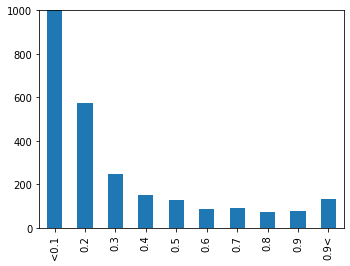

In [73]:
fig = plt.figure(figsize=(12,4))

ax = fig.add_subplot(1,2,1)
pd.cut(pred_21["pred_proba_3"],10, labels=counted_label).value_counts().sort_index().plot(kind='bar',ax=ax)
plt.ylim([0,1000])

plt.show()

In [74]:
warned_id_3 = pred_21.loc[pred_21.pred_3==1,"pipe_id"].values
pred_21.loc[pred_21.pred_3==1].value_counts('material')

material
C    421
D     18
S     11
O      4
A      0
dtype: int64

# Report Task1

### 《Overall》  
<br>
First, when building a model to predict the possibility of failure in 2021, I proceeded with data preprocessing assuming that the data in question was from 2020.<br>
<br>
Since there was no domain knowledge about each feature and the analysis was conducted internally, I focused only on the correlation coefficients between features and whether each feature was meaningful (i.e., having many NULL values or almost no variance), leaving the rest of the analysis to be handled by the machine.<br>
<br>
Additionally, the data in this case was imbalanced: when setting "whether the pipe had failed or not" as the target variable, the number of failed pipes was extremely small compared to the total data (about 15:1). In such cases where the data is skewed, if model creation is performed as is, the model might not predict the minority group effectively. Furthermore, if the model does not predict the minority group at all, it can still show high accuracy, which is misleading. To address this issue, I used the upsampling technique to artificially create data for the minority group based on the trends of that group.<br>
<br>
Using upsampling could lead to the tendencies of the failed data becoming overly emphasized. It’s important to carefully evaluate the model and the features used while making final decisions. However, in cases like this, where there is no domain knowledge and the number of features is high and difficult for humans to discern, I believe that, at least initially, it’s best to rely on the model’s judgment.<br>
<br>
Finally, I tested models like logistic regression and SVC, but ultimately decided to use a binary model based on XGBoost, which is strong with large datasets and features.

### 《Model Evaluation》  <br>
For the evaluation method, I used AUC as a reference, which is commonly used for imbalanced data, and proceeded by checking the Confusion Matrix.<br>
<br>
The results are as follows: as expected, the predictions for the "no failure" side, which has a large amount of data, have a high F1-score of 0.98. However, the predictions for the "failure" side are not as high, with an F1-score of about 0.64. That being said, since Precision and Recall are similar in value, it seems that the model is not overfitting to one of them. In cases where the goal is to "flag pipes with a potential failure," it’s possible to create a model that tends to predict "failure" more frequently, depending on the situation. This can be achieved by lowering the threshold for Predict_proba.<br>
<br>
In the model, in addition to the years in service and the pipe diameter, the material (C, D, S) was important. One issue is that there is no failure data for when Material = A, so even if other features for Material = A show tendencies of failure, the model might not predict failure as easily in these cases.<br>
<br>
Regarding this, I believe the only way to improve accuracy is to continue collecting data and refining the model over time.

[15:58:02] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[[20716   414]
 [  467   783]]
              precision    recall  f1-score   support

           0       0.98      0.98      0.98     21130
           1       0.65      0.63      0.64      1250

    accuracy                           0.96     22380
   macro avg       0.82      0.80      0.81     22380
weighted avg       0.96      0.96      0.96     22380

AUC score: 0.9169872787505916


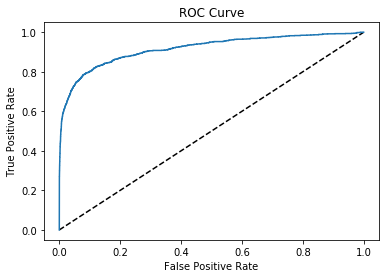

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, eta=1.0, gamma=0.5,
              gpu_id=-1, importance_type='weight', interaction_constraints='',
              learning_rate=1, max_delta_step=0, max_depth=15,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=10, n_jobs=8, num_parallel_tree=1, random_state=123,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=123,
              subsample=1, tree_method='exact', use_label_encoder=False,
              validate_parameters=1, verbosity=None)

In [75]:
model_checks_roc(xgbc3_w, X_train=X_resampled, y_train=y_resampled, if_plot=True) 

### 《features 》
When I ran the XGBoost model using permutation, the features that the model prioritized were Material, years in service, pipe diameter, followed by sensor data from the pipes. Just to be thorough, I created a model using only the top 30 features derived from the permutation test. Although the performance metrics slightly worsened, the accuracy remained almost the same.

Based on these results, it seems that the cause of pipe failures can be reasonably explained by these top 30 features or features that are strongly correlated with them (corr_high_df).

In [93]:
corr_high_df

,0,1,2,3,4,5,6,7,8,9,10
env_dat_56,env_dat_28,env_dat_30,env_dat_35,env_dat_36,env_dat_37,env_dat_40,env_dat_48,env_dat_49,env_dat_50,env_dat_51,env_dat_52
env_dat_52,env_dat_28,env_dat_30,env_dat_35,env_dat_36,env_dat_37,env_dat_40,env_dat_48,env_dat_49,env_dat_50,env_dat_51,env_dat_56
env_dat_50,env_dat_28,env_dat_30,env_dat_35,env_dat_36,env_dat_37,env_dat_40,env_dat_48,env_dat_49,env_dat_51,env_dat_52,env_dat_56
env_dat_49,env_dat_28,env_dat_30,env_dat_35,env_dat_36,env_dat_37,env_dat_40,env_dat_48,env_dat_50,env_dat_51,env_dat_52,env_dat_56
env_dat_35,env_dat_28,env_dat_36,env_dat_37,env_dat_40,env_dat_42,env_dat_48,env_dat_49,env_dat_50,env_dat_51,env_dat_52,env_dat_56
...,...,...,...,...,...,...,...,...,...,...,...
env_dat_100,env_dat_99,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
env_dat_111,env_dat_112,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
env_dat_112,env_dat_111,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
env_dat_115,env_dat_116,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
